###### FOUNDATION OF MACHINE LEARNING
### Practical Lab 
# **#3**
---

#### **Step 1**:
In this module, we will be exploring the data collected from diabetes patients to derive relationship, if any, between BMI and disease progression in the patients.

#### **Step 2 - 3**:
Import all required datasets and modules for manipulation and visualization

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import datasets

data_X, data_y = datasets.load_diabetes(return_X_y=True, as_frame=True, scaled=False)
# Print attributes and target values in data to understand different columns and rows in dataset that we are dealing with.
print("Attributes:\n", data_X)
print("Progression:\n", data_y)

Attributes:
       age  sex   bmi      bp     s1     s2    s3    s4      s5     s6
0    59.0  2.0  32.1  101.00  157.0   93.2  38.0  4.00  4.8598   87.0
1    48.0  1.0  21.6   87.00  183.0  103.2  70.0  3.00  3.8918   69.0
2    72.0  2.0  30.5   93.00  156.0   93.6  41.0  4.00  4.6728   85.0
3    24.0  1.0  25.3   84.00  198.0  131.4  40.0  5.00  4.8903   89.0
4    50.0  1.0  23.0  101.00  192.0  125.4  52.0  4.00  4.2905   80.0
..    ...  ...   ...     ...    ...    ...   ...   ...     ...    ...
437  60.0  2.0  28.2  112.00  185.0  113.8  42.0  4.00  4.9836   93.0
438  47.0  2.0  24.9   75.00  225.0  166.0  42.0  5.00  4.4427  102.0
439  60.0  2.0  24.9   99.67  162.0  106.6  43.0  3.77  4.1271   95.0
440  36.0  1.0  30.0   95.00  201.0  125.2  42.0  4.79  5.1299   85.0
441  36.0  1.0  19.6   71.00  250.0  133.2  97.0  3.00  4.5951   92.0

[442 rows x 10 columns]
Progression:
 0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439 

Visualize relation between attribute of interest - BMI and target - diabetes progression

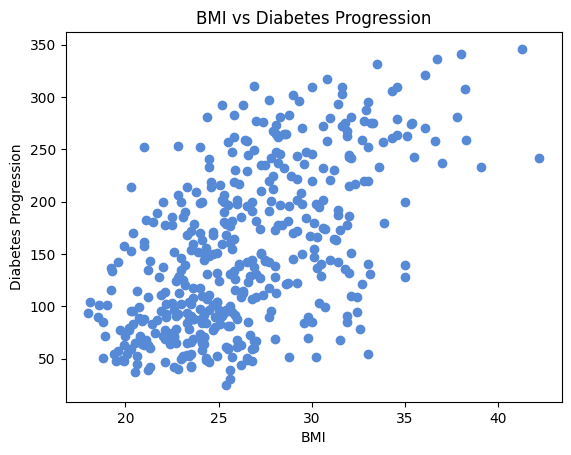

In [6]:
plt.scatter(data_X["bmi"], data_y, color="#578AD6")
# Fun fact: color code used here is the color of "blue circle" - global symbol for diabetes awareness :D
plt.title("BMI vs Diabetes Progression")
plt.xlabel("BMI")
plt.ylabel("Diabetes Progression")
plt.show()

From the graph, it is apparent that the relationship between BMI and diabetes is not uniform and data has high rate of spread.

#### **Step 6**:
Train a prediction model with available data

In [7]:
data_X, data_y = datasets.load_diabetes(return_X_y=True, scaled=True, as_frame=False)
bmi_X = data_X[:, 2].reshape((-1, 1))
X_train, X_test, y_train, y_test = train_test_split(
    bmi_X, data_y, test_size=0.2, random_state=0
)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#### **Step 7**:
Present solution and validate accuracy


Intercept: 152.28824927379569
Coefficient: [981.65543614]
Mean Squared Error (MSE): 4150.6801893299835


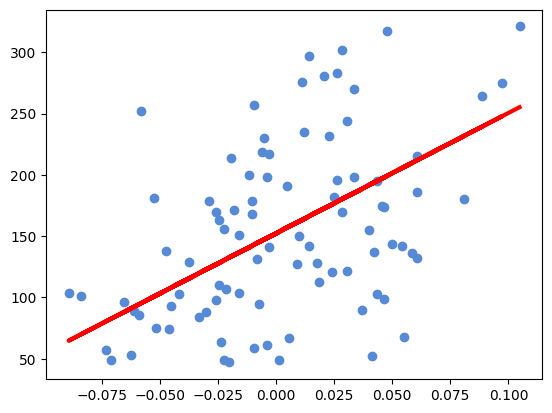

In [9]:
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_}")
print(f"Mean Squared Error (MSE): {metrics.mean_squared_error(y_test, y_pred)}")
plt.scatter(X_test, y_test, color="#578AD6")
plt.plot(X_test, y_pred, color="red", linewidth=3)
plt.show()

From the above graph, it is evident that our model has a large MSE value and not may not be very accurate in predictions. This is mainly because of the large rate of spread in the data it was trained on.